In [39]:
%run -m ipy_startup
%matplotlib inline
import tensorflow as tf

In [49]:
# # Regression Data
# n_vars = 2
# n_samples = 1000
# drop_pct = .5
# w = np.random.randn(n_vars)
# X = np.random.randn(n_samples, n_vars)
# y = np.hstack((np.multiply(X, w), np.random.randn(n_samples, 1)))

# y = np.sum(y, axis=1)
# idx = np.random.choice(np.arange(len(y)), replace=True, size=int(len(y) * drop_pct))
# y[idx] = np.nan

In [ ]:
# Classification Data
n_vars = 2
n_samples = 1000
drop_pct = .5

In [51]:
def predict(X, W, b, y, n_samples):
    y_pred = tf.reshape(tf.add(tf.matmul(X, W), b), [-1])
    y_fill = tf.select(tf.is_nan(y), y_pred, y)
    loss = tf.reduce_sum(tf.pow(y_fill - y_pred, 2)) / n_samples
    return W, b, y_pred, y_fill, loss

# def predict(X, W, b, y, n_samples):
#     y_pred = tf.reshape(tf.add(tf.matmul(X, W), b), [-1])
#     loss = tf.reduce_sum(tf.pow(y - y_pred, 2)) / n_samples
#     y_fill = None
#     return W, b, y_pred, y_fill, loss

def get_model(n_samples, n_vars):
    Xi = tf.placeholder(tf.float32, shape=[n_samples, n_vars])
    yi = tf.placeholder(tf.float32, shape=[n_samples])
    
    W = tf.Variable(tf.zeros([2,1]), name="weights")
    b = tf.Variable(tf.zeros([1]), name="bias")
    #b = tf.Variable(np.random.randn(), name='bias')
    
    W, b, y_pred, y_fill, loss = predict(Xi, W, b, yi, n_samples)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=.01).minimize(loss)
    return W, b, Xi, yi, y_pred, y_fill, optimizer, loss

In [52]:
tf.reset_default_graph()
W, b, Xi, yi, y_pred, y_fill, optimizer, loss = get_model(n_samples, n_vars)

In [53]:

init = tf.initialize_all_variables()
yp = None
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        #print(sess.run(y_fill, feed_dict={Xi:X, yi:y}))
        sess.run(optimizer, feed_dict={Xi:X, yi:y})
        if i % 10 == 0:
            c = sess.run(loss, feed_dict={Xi:X, yi:y})
            print('Iteration {}: Cost = {}'.format(i + 1, c))
    yp = sess.run(y_pred, feed_dict={Xi:X, yi:y})   

Iteration 1: Cost = 1.1217153072357178
Iteration 11: Cost = 1.014649510383606
Iteration 21: Cost = 0.9278941750526428
Iteration 31: Cost = 0.8575946092605591
Iteration 41: Cost = 0.8006275296211243
Iteration 51: Cost = 0.7544631958007812
Iteration 61: Cost = 0.7170517444610596
Iteration 71: Cost = 0.6867326498031616
Iteration 81: Cost = 0.6621610522270203
Iteration 91: Cost = 0.6422466039657593


In [54]:
d = pd.DataFrame(np.hstack([X, np.reshape(y, (-1, 1))])).add_prefix('X')
d = d.rename(columns={d.columns[-1]:'y'})
d['y_pred'] = yp
d.head()

,X0,X1,y,y_pred
0,0.426084,0.521041,0.906908,-0.348892
1,0.202492,1.816305,NaN,-0.411890
2,-2.300508,-0.231246,NaN,1.581662
3,-0.635307,-0.065465,1.945041,0.450516
4,-0.406291,-0.029994,1.305311,0.292883


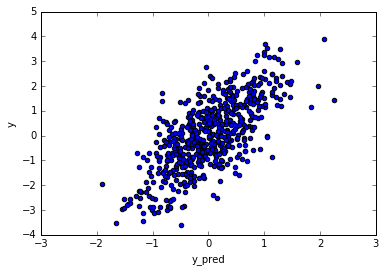

In [55]:
d.plot(kind='scatter', x='y_pred', y='y')

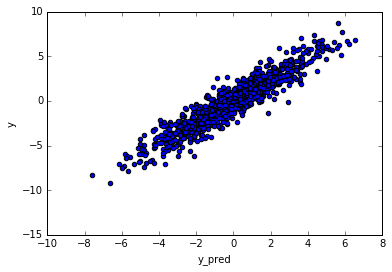

In [47]:
d.plot(kind='scatter', x='y_pred', y='y')